In [1]:
from IPython.display import Image

# Partial Dependence Plots

In this tutorial you will learn:
* What are partial dependence plots?
* How to plot a partial dependence plot?

## What are Partial Dependence Plots?

Partial Dependence Plots, or PDPs, are a way to explain the working of a machine learning model. They show the plot of output with respect to only one feature variable, which is useful in understanding the effect of that feature variable on the output. 

Machine learning models are often termed as *black boxes*, meaning that for a given model, we can only observe the input and output. There is no way to gauge the internal workings of a machine learning model. To counter this metaphor, partial dependence plot was introduced as a method to see how every feature variable affects the model. 

Partial dependence plots can help answer questions like:
* Is the housing rate of an area affected negatively or positively by increase in size?
* Is the wage difference between employees in a company more due to difference in gender or difference in skill levels?
* How does the chance of having heart disease vary with level of cholesterol?

An even easier way to visualise PDPs is to remember the role of coefficients in linear and logistic regression. Just like those coefficents, that tell us how much and in what way the feature variables affect the output, PDPs also tell us the correlation between each feature variable and output.

The only difference is that PDPs can be plotted for more complex models too, such as XGBoost, SVMs etc.

## How to plot a partial dependence plot?

While plotting PDP, it is important to remeber that PDP is only plotted after the data has been fit to the model using training dataset.

Scikit-learn has a library called PDPbox that can be used to plot PDP for required X (feature variables) and y (output). The example below uses an admissions dataset, which has student details and their chance of admit.

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

df = pd.read_csv('admissions.csv')
df.set_index('Serial No.', inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


For this dataset, we will try to understand what effect GRE Score and CGPA have on the student's chance of admit into college.

In [2]:
feature_names = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
                 'Research']
X = df[feature_names]
y = df['Chance of Admit ']

The next step is to fit the data and then plot the partial dependence plots.

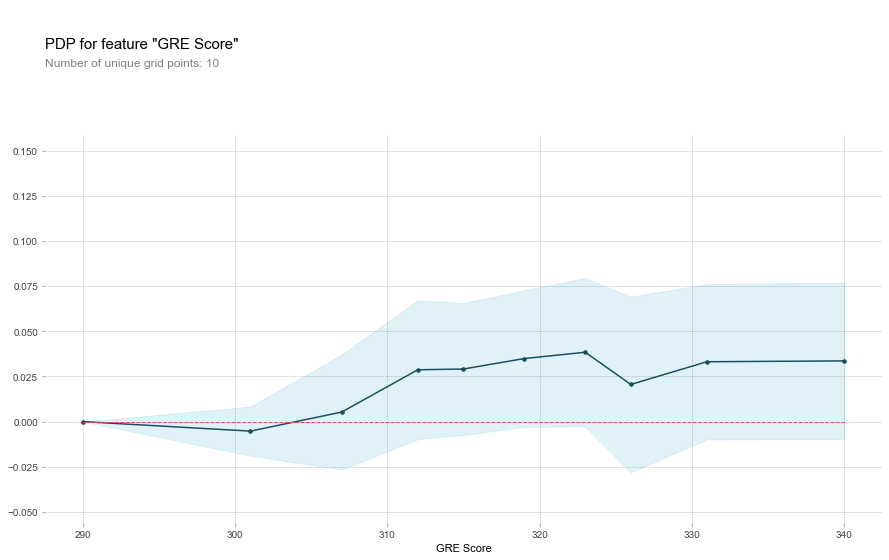

In [4]:
model = RandomForestRegressor().fit(X, y)

pdp_gre = pdp.pdp_isolate(model=model, dataset=X, model_features=feature_names, feature='GRE Score')
pdp.pdp_plot(pdp_gre, 'GRE Score')
plt.show()

We can see that a higher GRE score increases the chance of admit but there is a dip between 320 and 330, which implies the increase in score in this band decreases the chance of admit.

The blue shaded region in a PDPbox plot signifies the confidence region for that particular data point.

Lets see the PDP for CGPA.

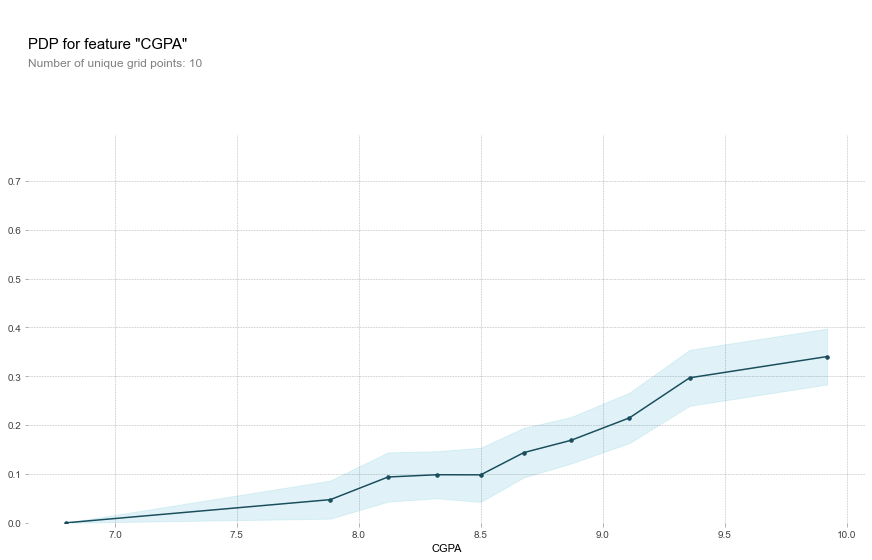

In [5]:
pdp_cgpa = pdp.pdp_isolate(model=model, dataset=X, model_features=feature_names, feature='CGPA')
pdp.pdp_plot(pdp_cgpa, 'CGPA')
plt.show()

CGPA and chance of admit have clear positive correlation.

Thus, using a partial dependence plot it becomes very easy to visualise the effect of each variable on the final result. This can also help in feature selection. If a feature does not have any noticeable effect on the output, it can be dropped from the training dataset.

## ICE plots

ICE stands for Individual Conditional Expectation. Individual Conditional Expectation (ICE) plots display one line per instance that shows how the instance's prediction changes when a feature changes.

PDP can sometimes be misleading because it averages out the change for all data points to show one plot line. This does not allow us to gauage if there are some exception data points, which vary differently with feature change.

This is why ICE plots are used. It can give us a clear representation for all data entries. PDPbox can be used for plotting ICE plots too by just setting the `plot_lines` parameter to true in the code for PDP plot.

Let's check how the ICE plots look for GRE scores and CGPA of given dataset.

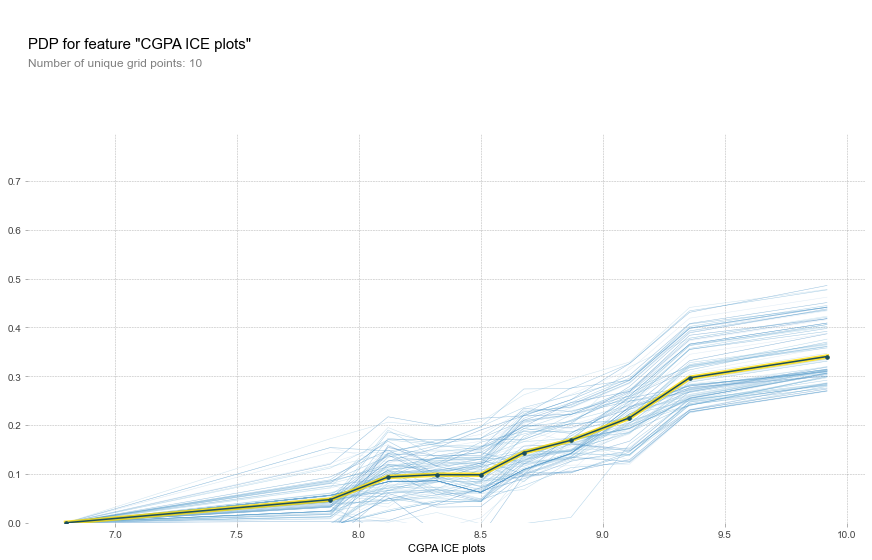

In [8]:
pdp_CGPA = pdp.pdp_isolate(
    model=model, dataset=df, model_features=feature_names, feature='CGPA')
fig, axes = pdp.pdp_plot(pdp_CGPA, 'CGPA ICE plots', plot_lines=True, frac_to_plot=100)

You can see that some data instances have a different trend of variation for effect on chance of admit with respect to CGPA. The same can be plotted for GRE scores too:

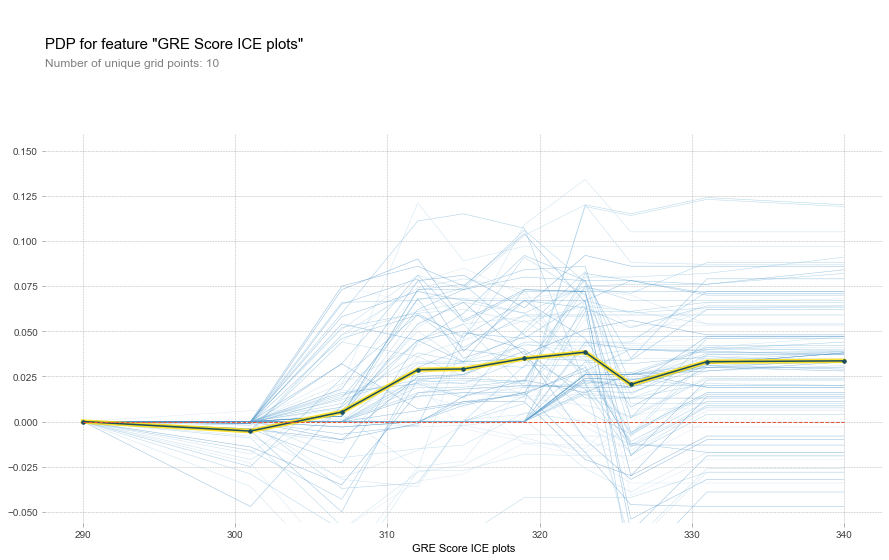

In [10]:
pdp_GRE = pdp.pdp_isolate(
    model=model, dataset=df, model_features=feature_names, feature='GRE Score')
fig, axes = pdp.pdp_plot(pdp_GRE, 'GRE Score ICE plots', plot_lines=True, frac_to_plot=100)

For GRE scores there's even greater deviation in individual trends. This is also why the confidence region for GRE score PDP was broader than the confidence region for CGPA PDP plot.

## References

1. Scikit-learn [documentation](https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html)
2. Interpretable ML [book](https://christophm.github.io/interpretable-ml-book/pdp.html)